In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount('/content/drive')

data = pd.read_csv('Measurement_summary.csv')

In [2]:

data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [3]:
df=data['O3']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(647511, 1)


In [4]:
list_=[]
for i in range (0,df.shape[0]):
  list_.append(df[i][0])
print(len(list_))

647511


In [5]:
window_size=5
y=[]
for i in range (0,len(list_)-5):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


647506 [0.002, 0.002, 0.002, 0.002, 0.002]


In [6]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['X1','X2','X3','X4','Y'])
new_data.head(10)


(647506, 5)


,X1,X2,X3,X4,Y
0,0.002,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002,0.002
2,0.002,0.002,0.002,0.002,0.002
3,0.002,0.002,0.002,0.002,0.002
4,0.002,0.002,0.002,0.002,0.002
5,0.002,0.002,0.002,0.002,0.002
6,0.002,0.002,0.002,0.002,0.004
7,0.002,0.002,0.002,0.004,0.005
8,0.002,0.002,0.004,0.005,0.005
9,0.002,0.004,0.005,0.005,0.007


In [7]:
# NORMALISE the DATASET
#from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
#matrix= scaler.fit_transform(matrix)
#mm_scaler.transform(X_test)
#new_data = pd.DataFrame(matrix,columns=['X1','X2','X3','X4','Y'])
#new_data.head(10)

In [8]:
print(matrix[:,4])

[[0.002]
 [0.002]
 [0.002]
 ...
 [0.015]
 [0.015]
 [0.004]]


In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
print(prediction.shape,prediction[0:5])

(213677, 1) [[0.00559856]
 [0.00712269]
 [0.04634444]
 [0.02411896]
 [0.01026515]]


In [10]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.6158255278844709
[0.00305242]
[[ 0.08367803  0.24250941 -0.30080875  0.80390221]]


In [11]:
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

0.04558441557940222
0.7304930305222535


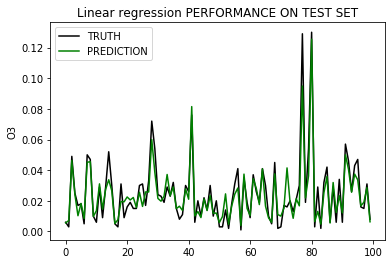

In [12]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [13]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
model = linear_model.BayesianRidge()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

0.045583827327799885
0.7304999862715673


C:\Users\richa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.043173844624357395
0.7582432177963728


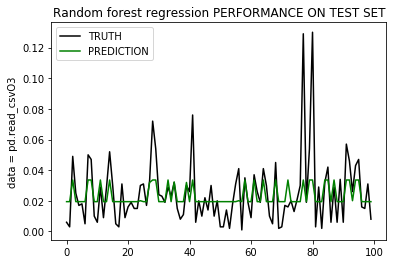

In [15]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('data = pd.read_csvO3')
plt.legend()
plt.show()

In [16]:
# IMPLEMENTING LASSO REGRESSION
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

0.08780751340649967
-1.324983242234623e-06


In [17]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))


0.04555641552274255
0.7308240161323096


In [18]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(mean_squared_error(y_test,prediction)**0.5)
print(r2_score(y_test,prediction))

C:\Users\richa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.04889874504910133
0.6898779508721751


C:\Users\richa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


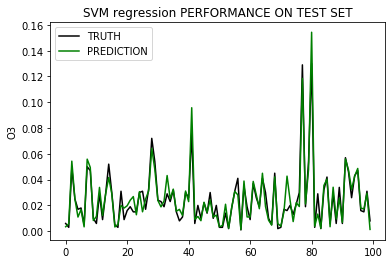

In [19]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [20]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=50, batch_size=64)

Using TensorFlow backend.


Epoch 1/50
433829/433829 [==============================] - 12s 27us/step - loss: 0.0112 - accuracy: 0.0077
Epoch 2/50
433829/433829 [==============================] - 11s 26us/step - loss: 0.0112 - accuracy: 0.0077
Epoch 3/50
433829/433829 [==============================] - 12s 27us/step - loss: 0.0112 - accuracy: 0.0077
Epoch 4/50
433829/433829 [==============================] - 12s 28us/step - loss: 0.0112 - accuracy: 0.0077
Epoch 5/50
433829/433829 [==============================] - 11s 26us/step - loss: 0.0112 - accuracy: 0.0077
Epoch 6/50
433829/433829 [==============================] - 11s 26us/step - loss: 0.0112 - accuracy: 0.0077
Epoch 7/50
433829/433829 [==============================] - 11s 26us/step - loss: 0.0112 - accuracy: 0.0077
Epoch 8/50
433829/433829 [==============================] - 11s 25us/step - loss: 0.0112 - accuracy: 0.0077
Epoch 9/50
433829/433829 [==============================] - 12s 28us/step - loss: 0.0112 - accuracy: 0.0077
Epoch 10/50
433829/433829 [=

dict_keys(['loss', 'accuracy'])


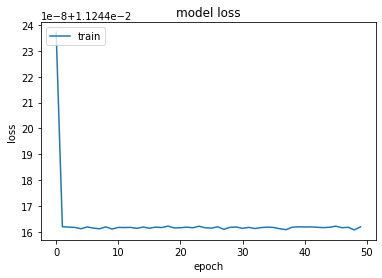

0.08964281046616178


In [21]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print(mean_squared_error(y_test,y_pred)**0.5)
#Converting predictions to label


In [22]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.011 0.015 0.025 0.03 ]
 [0.046 0.038 0.04  0.034]
 [0.046 0.046 0.045 0.041]
 ...
 [0.02  0.017 0.016 0.017]
 [0.027 0.036 0.041 0.044]
 [0.035 0.035 0.035 0.032]]
(433829, 4)
(433829, 4, 1)


In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
433829/433829 [==============================] - 144s 332us/step - loss: 0.0050
Epoch 2/30
433829/433829 [==============================] - 141s 325us/step - loss: 0.0047
Epoch 3/30
433829/433829 [==============================] - 146s 337us/step - loss: 0.0046
Epoch 4/30
433829/433829 [==============================] - 138s 319us/step - loss: 0.0047
Epoch 5/30
433829/433829 [==============================] - 139s 321us/step - loss: 0.0047
Epoch 6/30
433829/433829 [==============================] - 146s 337us/step - loss: 0.0046
Epoch 7/30
433829/433829 [==============================] - 169s 390us/step - loss: 0.0046
Epoch 8/30
433829/433829 [==============================] - 152s 350us/step - loss: 0.0046
Epoch 9/30
433829/433829 [==============================] - 150s 346us/step - loss: 0.0045
Epoch 10/30
433829/433829 [==============================] - 148s 342us/step - loss: 0.0045
Epoch 11/30
433829/433829 [==============================] - 149s 342us/step - loss: 0.00

dict_keys(['loss'])


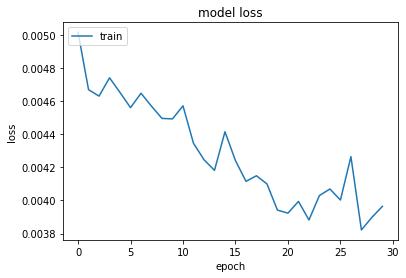

0.042574561281514954


In [24]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
y_pred = regressor.predict(X_test)
print(mean_squared_error(y_test,y_pred)**0.5)

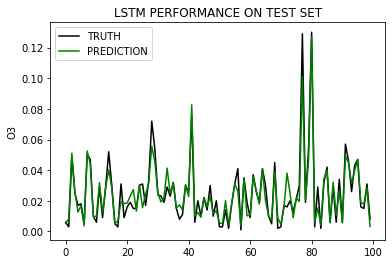

In [25]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(y_pred[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()